# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
#from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals_v1 as vs

# Pretty display for notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)
data.head()

Boston housing dataset has 489 data points with 4 variables each.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

For an easy justification I plotted the dependencies. From the figures bellow we observe the followings:
- If we take `cost/unit surface` as measure, increasing RM produces increased price as the surface area is ususally ptoportional to RM
- As LSTAT is increasing the prices are decreasing also expected as in poor neighborhoods it is not likely to find expensive houses
- As PTRATIO increases the prices tend decrease probably as the expensive neighborhoods have private schools with less students

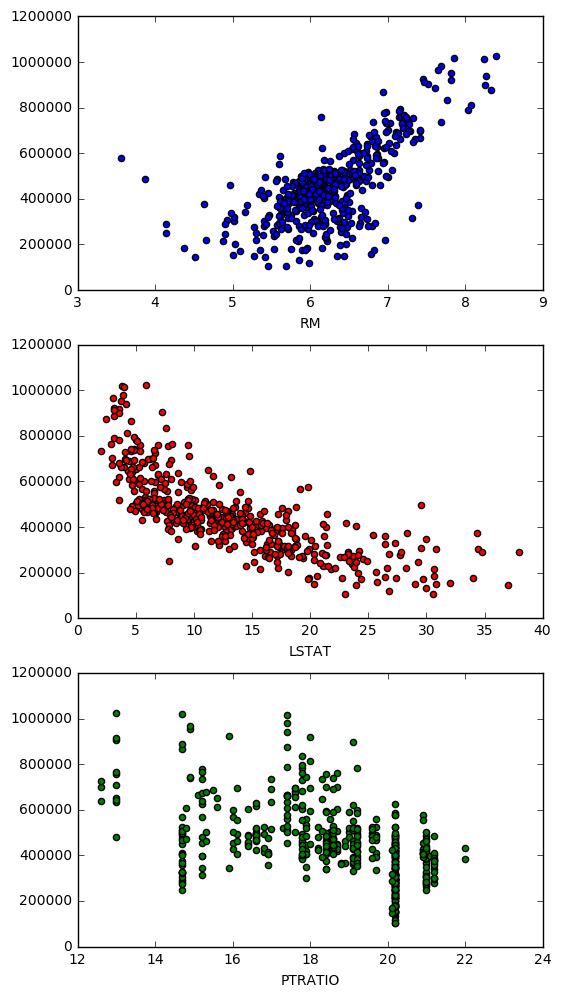

In [3]:
fig = plt.figure(figsize=(6,12))
plt.subplot(3,1,1)
plt.scatter(features['RM'], prices, c='b', marker='o')
plt.xlabel('RM')
plt.subplot(3,1,2)
plt.scatter(features['LSTAT'], prices, c='r', marker='o')
plt.xlabel('LSTAT')
plt.subplot(3,1,3)
plt.scatter(features['PTRATIO'], prices, c='g', marker='o')
plt.xlabel('PTRATIO')

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
The model explains 92.3% of the variance. It's score is close to 1, so it is quite an  accurate model

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices, test_size=0.33,random_state=63)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


In [7]:
X_train.head(10)

,RM,LSTAT,PTRATIO
331,6.540,8.65,15.9
37,5.850,8.77,19.2
228,6.631,9.54,17.4
262,6.538,7.73,18.6
467,5.871,13.34,20.2
144,4.903,29.29,14.7
414,6.833,19.69,20.2
177,6.144,9.45,17.8
263,7.691,6.58,18.6
402,6.824,22.74,20.2


In [8]:
X_test.tail(10)

,RM,LSTAT,PTRATIO
447,6.209,13.22,20.2
400,5.304,26.64,20.2
190,7.287,4.08,12.6
397,4.519,36.98,20.2
0,6.575,4.98,15.3
130,6.458,12.60,21.2
147,4.926,29.53,14.7
163,5.877,12.14,14.7
142,5.403,26.82,14.7
125,5.986,14.81,19.1


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

By splitting the data in train-test sets we can test the predictive strength of our model. Usually the training set is always predicted quite well if one choses the proper model. However if the score of the test-set is much lower than that of the train-set the model suffers from overfitting or the model is too complex and fail to generalize. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

[  1  50  98 147 196 244 293 342 390]
d: 1
 train:[ 1.          0.56100364  0.51004554  0.51260482  0.48956553  0.47674092
  0.46044016  0.45939529  0.45634148] 
 test:[-0.20009584  0.37449712  0.40065884  0.40445278  0.41966023  0.39745028
  0.41795627  0.39563803  0.39604441]
d: 3
 train:[ 1.          0.89965647  0.87144616  0.85978011  0.84103005  0.83542747
  0.82722384  0.82128451  0.8247727 ] 
 test:[-0.20009584  0.62676394  0.71080846  0.73249514  0.75461392  0.74808639
  0.77197493  0.77076083  0.76349216]
d: 6
 train:[ 1.          0.98994818  0.972826    0.95812835  0.94770805  0.93696495
  0.92994523  0.92564157  0.92325587] 
 test:[-0.20009584  0.60686038  0.67196405  0.72865249  0.7552846   0.74266654
  0.75375369  0.75235683  0.74136249]
d: 10
 train:[ 1.          0.99996588  0.99878896  0.99639939  0.99294404  0.99158675
  0.98764821  0.98418312  0.97996111] 
 test:[-0.20009584  0.59786921  0.6527852   0.68348925  0.70331735  0.70377129
  0.6955469   0.67886996  0.6885290

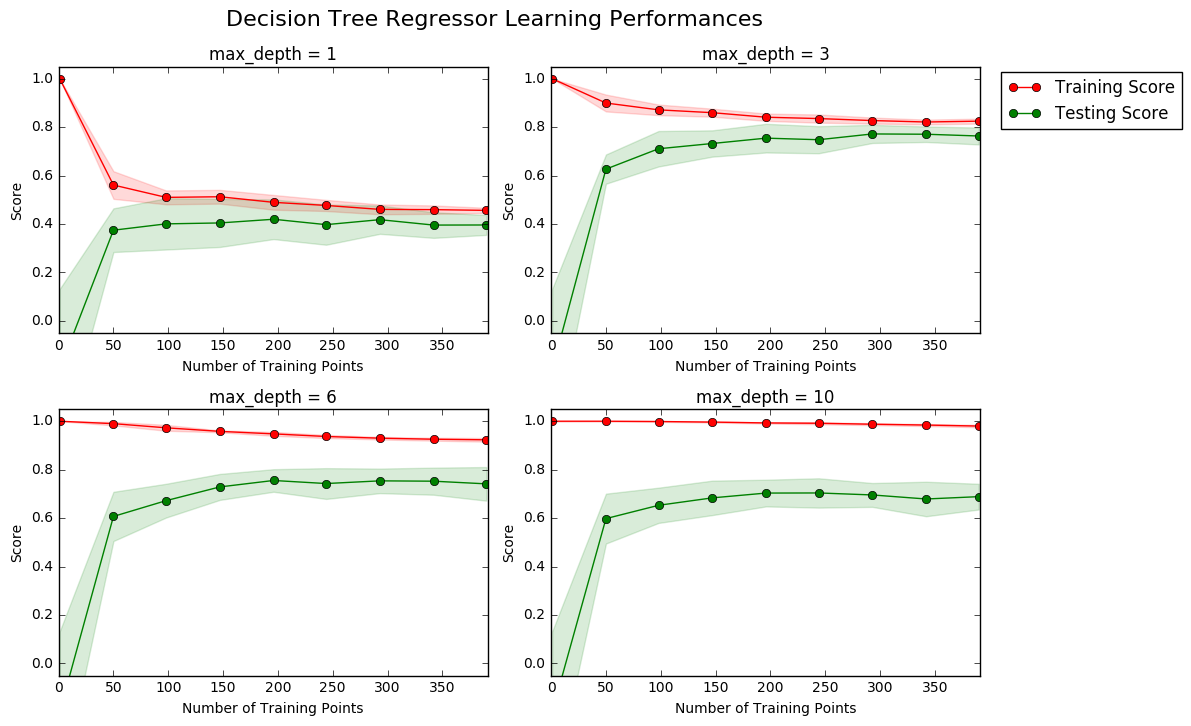

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

- The best choice seems to be `max_depth = 3`, in this case the training and test scores converge towards 0.8. For `max_depth > 3` the test and train score not converging furthermore the maximum test score is lower compared to `max_depth = 3`
- Observing the curves above there is a kind of threshold of number of training points below which the test scores are very low. Above that threshold (~50 to 100 points) the test scores improves gradually to a maximum at around (250-300 points) and then decreases again (only for `max_depth > 3`). It seems that 150 go 200 points will suffice to obtain a good test score.
- Having more points will not benefit the model as even the training score is decreasing - that seems a bit **weird**.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

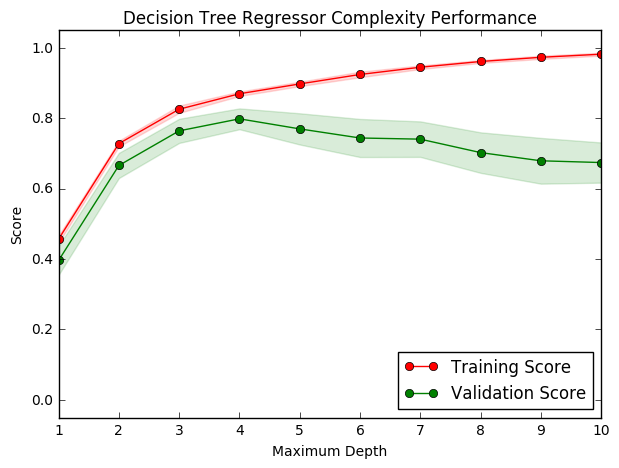

In [10]:
#vs.ModelComplexity(X_train, y_train) 
# I am not sure why are we using X_train and not the full dataset 

vs.ModelComplexity(features, prices)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
 - `max_depth =1` the model lack complexity as less than 50% of the training-variance and less than 40% of the testing-variance is explained by the model, that is not very accurate meaning that the results are biased
 - `max_depth =10` the model is 'too' complex as the training score approaches 1 while the test score is around 0.7, that is overfitting of the data and an increased variance of the test data
 - in fact the validation-score display a maximum that suggests the optimum value for considered parameter

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

- `max_depth = 4` is the best choise as its test-score is at the maximum of the 'validation-score' curve. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
Exhaustive search over specified parameter values for an estimator [scikit-learn.org]
Grid search technique is used to find optimum values for the model's hyperparameters that cannot be learnt automatically. Using the best set of hyperparamteres will result in increased model performance 

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
- In k-fold cross-validation the dataset is partitioned in k folds (consecutive or shuffled) comprising k-1 training folds and one test fold.The final score is computed as the average over the k folds
- One of the benefits of k-fold cross validation is that basically all the data is used for training as well for validation
- Another benefit would be that this technique is less sensitive to partioning the data. For example: if k=10 then only 1/10 of the observations are used for testing. This can result in a higher variance. But repeating 10 times the procedure, and averaging the variances the model become less sensitive to partioning  

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [11]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor,param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_,grid.cv_results_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [12]:
# Fit the training data to the model using grid search
#reg, results = fit_model(X_train, y_train)
best_fitter, results = fit_model(features, prices)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(best_fitter.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


In [13]:
resultsDF = pd.DataFrame(results)
results = resultsDF[['mean_test_score', 'mean_train_score','param_max_depth','rank_test_score']]
results

,mean_test_score,mean_train_score,param_max_depth,rank_test_score
0,0.396028,0.456541,1,10
1,0.665503,0.727576,2,9
2,0.763729,0.825166,3,3
3,0.797149,0.869009,4,1
4,0.771647,0.896895,5,2
5,0.736122,0.923759,6,4
6,0.734907,0.944269,7,5
7,0.696866,0.960590,8,6
8,0.684398,0.972552,9,7
9,0.682580,0.981320,10,8


In [14]:
test_score =[]
train_score =[]
best_idx = pd.Index(results['rank_test_score']).get_loc(1)
for i in range(10):
    split_test = 'split'+str(i)+'_test_score'
    split_train = 'split'+str(i)+'_train_score'
    test_s = resultsDF[split_test][best_idx]
    test_score.append(test_s)
    train_s = resultsDF[split_train][best_idx]
    train_score.append(train_s)
    print '{:2d} test-s: {:.3f} train-s: {:.3f}'.format(i+1,test_s, train_s)

print 'mean test score: {:.5f} mean train score: {:.5f}'.format(np.mean(test_score),np.mean(train_score))

 1 test-s: 0.773 train-s: 0.875
 2 test-s: 0.773 train-s: 0.868
 3 test-s: 0.842 train-s: 0.868
 4 test-s: 0.784 train-s: 0.868
 5 test-s: 0.783 train-s: 0.876
 6 test-s: 0.837 train-s: 0.861
 7 test-s: 0.751 train-s: 0.882
 8 test-s: 0.805 train-s: 0.861
 9 test-s: 0.818 train-s: 0.867
10 test-s: 0.806 train-s: 0.866
mean test score: 0.79715 mean train score: 0.86901


**Answer: **

The optimal model has `max_depth` of 4 as estimated in **Q6**

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [15]:
# Produce a matrix for client data
client_data =np.array([[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]])  # Client 3
client_price =[]
# Show predictions
for i, price in enumerate(best_fitter.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    client_price.append(price)

client_price =np.array(client_price)

Predicted selling price for Client 1's home: $408,800.00
Predicted selling price for Client 2's home: $231,253.45
Predicted selling price for Client 3's home: $938,053.85


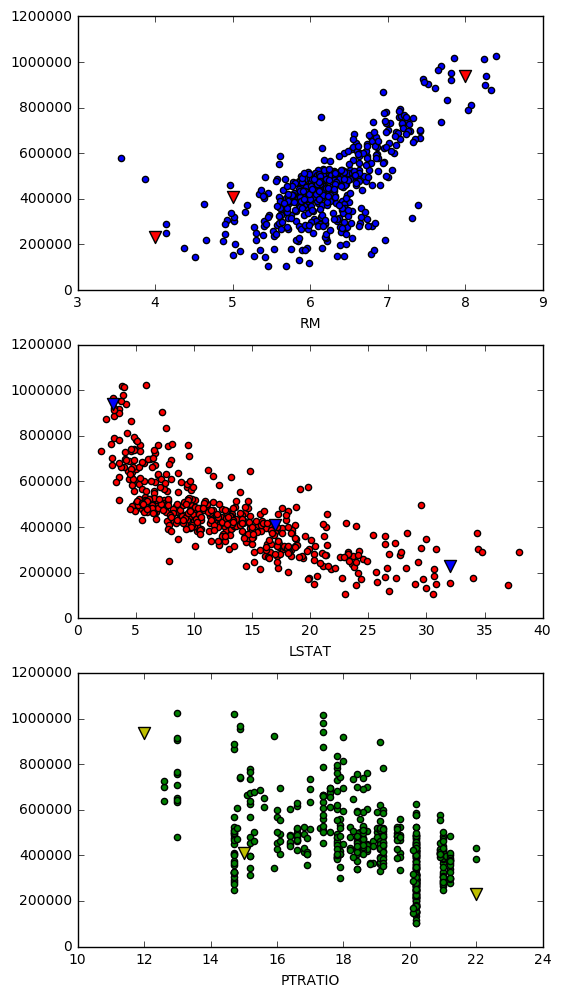

In [16]:
fig = plt.figure(figsize=(6,12))
plt.subplot(3,1,1)
plt.scatter(features['RM'], prices, c='b', marker='o')
plt.scatter(client_data[:,0],client_price,s=75, c='r', marker='v')
plt.xlabel('RM')
plt.subplot(3,1,2)
plt.scatter(features['LSTAT'], prices, c='r', marker='o')
plt.scatter(client_data[:,1],client_price,s=75, c='b', marker='v')
plt.xlabel('LSTAT')
plt.subplot(3,1,3)
plt.scatter(features['PTRATIO'], prices, c='g', marker='o')
plt.scatter(client_data[:,2],client_price,s=75, c='y', marker='v')
plt.xlabel('PTRATIO')

**Answer: part 1**
Plotting the test data on over the initial data we observe the followings:
 - the predicted prices are reasonable for the given feature-values
 - the model is doing well to predict "LSTAT" feature as the test points are kind in the middle of the train data
 - for RM ~ 8 the model is OK but at lower RM it tends to overestimate the price. For RM = 4 it seems that there was not sufficient data compared to 5 <= RM <= 7. 
 - the model is doing not so well in considering PTRATIO as it tend to underestimate the price. Furthermore, there no data around PTRATIO =12 so basically we should not test outside the interval covered by the training data

In [52]:
#thanks for the PRO tip
from sklearn.neighbors import NearestNeighbors
#num_neighbors=5
def nearest_neighbor_price(x):
    def find_nearest_neighbor_indexes(x, X):  # x is your vector and X is the data set.
        neigh = NearestNeighbors()
        neigh.fit(X)
        x = x.reshape(1,-1)
        distance, indexes = neigh.kneighbors(x)
        return indexes
    indexes = find_nearest_neighbor_indexes(x, features)
    sum_prices = []
    for i in indexes:
        sum_prices.append(prices[i])
    neighbor_avg = np.mean(sum_prices)
    return neighbor_avg

In [55]:
index = 0  
for j,i in enumerate(client_data):
    val=nearest_neighbor_price(i)
    index += 1
    print "The predicted {} NNs price for home {} is: ${:,.2f} compared to ${:,.2f} that is {:.2f}%"\
            .format(num_neighbors,index, val, client_price[j],(client_price[j]-val)*100.0/val)

The predicted 5 NNs price for home 1 is: $372,540.00 compared to $408,800.00 that is 9.73%
The predicted 5 NNs price for home 2 is: $162,120.00 compared to $231,253.45 that is 42.64%
The predicted 5 NNs price for home 3 is: $897,120.00 compared to $938,053.85 that is 4.56%


**Answer: part 2**
If compare our model to that predicted by 5 nearest neighbors the prediction for home 1 and 3 are close less than 10% difference. For home 2 our model predicts 43% higher price, but there are not many close 'neighbors' for this feature vector (if we look at the plots).  

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [19]:
vs.PredictTrials(features, prices, best_fitter, client_data)

Trial 1
client 1: $391,183.33
client 2: $189,123.53
client 3: $942,666.67
Trial 2
client 1: $411,417.39
client 2: $230,828.57
client 3: $937,230.00
Trial 3
client 1: $415,800.00
client 2: $236,478.26
client 3: $888,720.00
Trial 4
client 1: $420,622.22
client 2: $235,122.22
client 3: $896,280.00
Trial 5
client 1: $413,334.78
client 2: $227,460.00
client 3: $896,962.50
Trial 6
client 1: $411,931.58
client 2: $235,620.00
client 3: $922,740.00
Trial 7
client 1: $399,663.16
client 2: $238,132.08
client 3: $896,962.50
Trial 8
client 1: $407,232.00
client 2: $229,200.00
client 3: $979,300.00
Trial 9
client 1: $402,531.82
client 2: $237,900.00
client 3: $923,766.67
Trial 10
client 1: $413,700.00
client 2: $228,385.71
client 3: $941,220.00

Client 1 Range in prices: $29,438.89

Client 2 Range in prices: $49,008.55

Client 3 Range in prices: $90,580.00


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

- *How relevant today is data that was collected from 1978?* 
   Not very relevant as probably today people would consider different features when buying a house
   
- *Are the features present in the data sufficient to describe a home?*
    With the features considered in the present study the model explains ~80% of variance. The question is if 80% is acceptable. If not we should consider some additional features to increase the performance of the model  

- *Is the model robust enough to make consistent predictions?*
    If the ranges computed at "Sensitivity" section are acceptable than the we could consider th model robust
    
- *Would data collected in an urban city like Boston be applicable in a rural city?*
    Not at all as the prices as well as the features would be quite different

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.